In [1]:
import pandas as pd
import nba_api


In [4]:
master_season_df = pd.read_parquet('nba_master_seasons.parquet', engine='fastparquet')
master_career_df = pd.read_parquet('nba_master_careers.parquet', engine='fastparquet')
print(master_season_df.shape)
print(master_career_df.shape)


(30836, 27)
(4862, 24)


In [2]:
from nba_api.stats.static import players

nba_players = players.get_players()
player_id_to_name = {player['id']: player['full_name'] for player in nba_players}

In [3]:
player_id_to_name

{76001: 'Alaa Abdelnaby',
 76002: 'Zaid Abdul-Aziz',
 76003: 'Kareem Abdul-Jabbar',
 51: 'Mahmoud Abdul-Rauf',
 1505: 'Tariq Abdul-Wahad',
 949: 'Shareef Abdur-Rahim',
 76005: 'Tom Abernethy',
 76006: 'Forest Able',
 76007: 'John Abramovic',
 203518: 'Alex Abrines',
 1630173: 'Precious Achiuwa',
 101165: 'Alex Acker',
 76008: 'Donald Ackerman',
 76009: 'Mark Acres',
 76010: 'Charles Acton',
 203112: 'Quincy Acy',
 76011: 'Alvan Adams',
 76012: 'Don Adams',
 200801: 'Hassan Adams',
 1629121: 'Jaylen Adams',
 203919: 'Jordan Adams',
 149: 'Michael Adams',
 203500: 'Steven Adams',
 912: 'Rafael Addison',
 1628389: 'Bam Adebayo',
 1629061: 'Deng Adel',
 76015: 'Rick Adelman',
 202399: 'Jeff Adrien',
 201167: 'Arron Afflalo',
 1630534: 'Ochai Agbaji',
 200772: 'Maurice Ager',
 76016: 'Mark Aguirre',
 201336: 'Blake Ahearn',
 76017: 'Danny Ainge',
 201582: 'Alexis Ajinca',
 76018: 'Henry Akin',
 203006: 'Josh Akognon',
 1629152: 'DeVaughn Akoon-Purcell',
 202374: 'Solomon Alabi',
 76019: 'Ma

In [6]:
master_season_df.keys()

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [10]:
import numpy as np

# 1. Create a copy of the dataframe to keep the original master_season_df intact
master_season_pergame_df = master_season_df.copy()

# 2. Define the columns that need to be converted to "Per Game" stats
# Note: We exclude percentages (FG_PCT, etc.) and metadata (SEASON_ID, etc.)
per_game_cols = [
    'MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 
    'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'
]

# 3. Perform the division, handling the "Divide by Zero" exception
for col in per_game_cols:
    # Logic: If GP > 0, calculate Stat / GP. Otherwise, set to 0.
    master_season_pergame_df[col] = np.where(
        master_season_pergame_df['GP'] > 0, 
        master_season_pergame_df[col] / master_season_pergame_df['GP'], 
        0
    )

# 4. Map the Player Names using your dictionary
# This creates a new column 'PLAYER_NAME' by looking up the 'PLAYER_ID'
master_season_pergame_df['PLAYER_NAME'] = master_season_pergame_df['PLAYER_ID'].map(player_id_to_name)

# 5. Optional: Reorder columns to put PLAYER_NAME at the front for better readability
cols = list(master_season_pergame_df.columns)
# Move PLAYER_NAME to be the second column (after PLAYER_ID)
if 'PLAYER_NAME' in cols:
    cols.insert(1, cols.pop(cols.index('PLAYER_NAME')))
    master_season_pergame_df = master_season_pergame_df[cols]

# Check the result
print(master_season_pergame_df.keys())
master_season_pergame_df.head()

Index(['PLAYER_ID', 'PLAYER_NAME', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


,PLAYER_ID,PLAYER_NAME,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,76001,Alaa Abdelnaby,1990-91,00,1610612757,POR,23.0,43,0.0,6.744186,...,0.568,0.627907,1.441860,2.069767,0.279070,0.093023,0.279070,0.511628,0.906977,3.139535
1,76001,Alaa Abdelnaby,1991-92,00,1610612757,POR,24.0,71,1.0,13.154930,...,0.752,1.140845,2.521127,3.661972,0.422535,0.352113,0.225352,0.929577,1.859155,6.084507
2,76001,Alaa Abdelnaby,1992-93,00,1610612749,MIL,25.0,12,0.0,13.250000,...,0.750,1.000000,2.083333,3.083333,0.833333,0.500000,0.333333,1.083333,2.000000,5.333333
3,76001,Alaa Abdelnaby,1992-93,00,1610612738,BOS,25.0,63,52.0,18.285714,...,0.760,1.809524,2.952381,4.761905,0.269841,0.301587,0.349206,1.333333,2.619048,8.158730
4,76001,Alaa Abdelnaby,1992-93,00,0,TOT,25.0,75,52.0,17.480000,...,0.759,1.680000,2.813333,4.493333,0.360000,0.333333,0.346667,1.293333,2.520000,7.706667


# Step 2: Data Preprocessing & Machine Learning

Now that we have per-game statistics, we need to prepare the data for our Machine Learning models (K-Means Clustering and Nearest Neighbors).

## 1. Data Cleaning
* **Filter for the latest season:** We will focus on the most recent season (e.g., '2023-24' or '2024-25') to analyze current player types.
* **Filter for active rotation players:** To prevent "garbage time" players from skewing our clusters, we will filter for players who have played at least **20 games**.
* **Handle Missing Values:** Ensure any `NaN` values (likely from 0 attempts in percentages) are filled with 0.

## 2. Feature Selection
We will select the specific "gameplay" features that define a player's style. We exclude metadata like `PLAYER_ID` or `TEAM_ID` from the clustering algorithm.

## 3. Standardization (Scaling)
We use `StandardScaler` from Scikit-Learn.
* **Why?** K-Means and Euclidean Distance are sensitive to the *scale* of the data.
* **Goal:** Transform all features to have a Mean of 0 and a Standard Deviation of 1.

In [12]:
from sklearn.preprocessing import StandardScaler

# 1. Filter for the analysis set (e.g., 2023-24 Season)
# Adjust '2023-24' to whatever your latest SEASON_ID is in the CSV
target_season = '2024-25'
ml_df = master_season_pergame_df[master_season_pergame_df['SEASON_ID'] == target_season].copy()

# 2. Filter for significant playing time (e.g., > 20 Games Played)
# This removes players who played 1 game and have "perfect" but noisy stats
ml_df = ml_df[ml_df['GP'] >= 20]

# 3. Handle NaNs in Percentages (0/0 is NaN, should be 0.0)
pct_cols = ['FG_PCT', 'FG3_PCT', 'FT_PCT']
ml_df[pct_cols] = ml_df[pct_cols].fillna(0)

# 4. Define the features for Clustering
# We use the per-game stats we calculated + percentages
features = [
    'PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV',  # Counting stats
    'FG_PCT', 'FG3_PCT', 'FT_PCT',             # Efficiency
    'FG3A', 'FGA', 'FTA'                       # Volume/Usage indicators
]

# 5. Initialize the Scaler
scaler = StandardScaler()

# 6. Fit and Transform the data
# We create a new dataframe for the scaled data so we don't lose the original values
scaled_features = scaler.fit_transform(ml_df[features])
ml_scaled_df = pd.DataFrame(scaled_features, columns=features, index=ml_df.index)

# 7. Verification
print(f"Original Data Shape: {ml_df.shape}")
print(f"Scaled Data Shape: {ml_scaled_df.shape}")
print("\nFirst 5 rows of SCALED data (Values should be mostly between -3 and 3):")
print(ml_scaled_df.head())

Original Data Shape: (551, 28)
Scaled Data Shape: (551, 12)

First 5 rows of SCALED data (Values should be mostly between -3 and 3):
          PTS       REB       AST       STL       BLK       TOV    FG_PCT  \
97  -0.536979  0.696866 -0.777711  0.220139  0.769625 -0.546117  0.511791   
174 -0.964529  0.729712 -0.684411 -0.931648  0.126589 -0.371461  1.092255   
188  1.227021  2.431371  1.031796  1.337257  0.624471  1.026512  0.282306   
224  0.045384 -0.067193 -0.472313  0.431454  0.091136 -0.479152  0.457795   
289  0.362603  1.056800  0.261637  0.156603  0.033949 -0.172483  0.255308   

      FG3_PCT    FT_PCT      FG3A       FGA       FTA  
97  -0.391880 -1.509042 -1.123658 -0.463974 -0.443643  
174 -2.952996 -2.709922 -1.374465 -1.058440 -0.214327  
188  0.335919  0.046644 -0.198823  1.311061  1.304063  
224  0.722850 -0.471918  0.271539  0.078354 -0.712415  
289  0.437258 -0.626577  0.717735  0.416511 -0.306127  


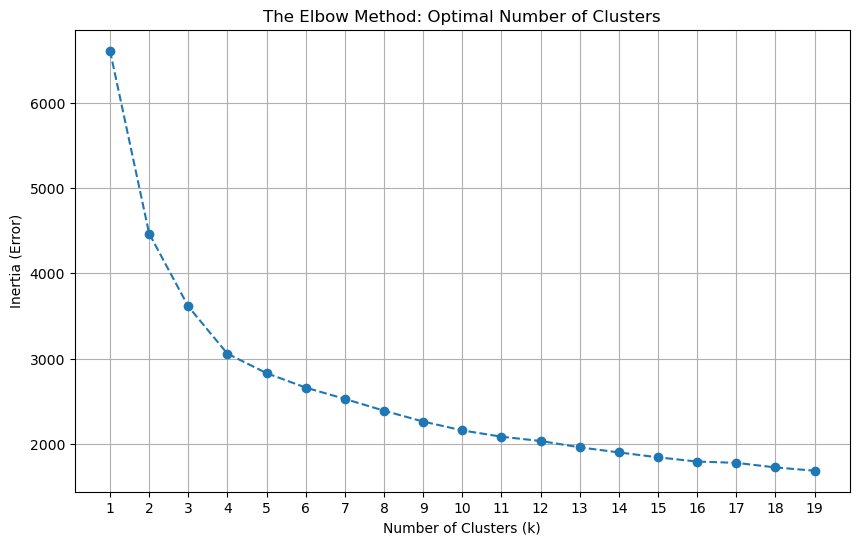

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Initialize a list to store the "inertia" (sum of squared distances) for each k
inertia = []
k_range = range(1, 20)  # We will test from 1 to 10 clusters

# 2. Loop through 1 to 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(ml_scaled_df)  # Use the SCALED data!
    inertia.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('The Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Error)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [17]:
# 1. Initialize the K-Means model with k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# 2. Fit the model to the SCALED data
kmeans.fit(ml_scaled_df)

# 3. Get the cluster labels (0, 1, 2, 3)
cluster_labels = kmeans.labels_

# 4. Add the labels back to our ORIGINAL DataFrame (for readability)
ml_df['Cluster'] = cluster_labels

# 5. Interpret the Clusters
# We group by 'Cluster' and take the average of key stats to see what they are
cluster_summary = ml_df.groupby('Cluster')[features].mean()

# Sort by Points just to have a consistent order
cluster_summary = cluster_summary.sort_values('PTS', ascending=False)

print("Cluster Averages (Real Stats):")
print(cluster_summary[['PTS', 'REB', 'AST', 'FG3_PCT', 'BLK']])

# 6. Count how many players are in each cluster
print("\nPlayer Counts per Cluster:")
print(ml_df['Cluster'].value_counts())

Cluster Averages (Real Stats):
               PTS       REB       AST   FG3_PCT       BLK
Cluster                                                   
2        21.015077  5.949741  4.976172  0.357466  0.616172
0        10.500155  3.850762  2.577602  0.357734  0.377303
3         7.334323  6.334019  1.482296  0.076509  0.894244
1         4.510633  2.211970  1.068216  0.330849  0.256390

Player Counts per Cluster:
Cluster
0    207
1    186
2    103
3     55
Name: count, dtype: int64


# Step 3: Similarity Engine & Player Comparison

Now that we have our clusters, we will build a function to find the "modern equivalent" of any player.

## How it works:
1. **Input:** A `PLAYER_ID` and `SEASON_ID` (e.g., Michael Jordan, 1995-96).
2. **Transform:** We take that player's raw stats and run them through our existing `StandardScaler`. This projects the historical player into the "Modern NBA Statistical Space."
3. **Compare:** We calculate the **Euclidean Distance** between that player and every active player in our `ml_scaled_df`.
4. **Output:** The 5 active players with the smallest distance (most similar stats).

In [18]:
from sklearn.metrics.pairwise import euclidean_distances

# 1. Define our Cluster Names map
cluster_names = {
    2: "All-Star / Primary Scorer",
    0: "Rotation Scorer / Wing",
    3: "Traditional Big / Rim Protector",
    1: "Deep Bench / Role Player"
}

# 2. Assign the human-readable names to our ML DataFrame
ml_df['Player_Type'] = ml_df['Cluster'].map(cluster_names)

def find_similar_players(player_id, season_id, top_n=5):
    """
    Finds the most similar modern players to a specific historical player season.
    """
    
    # A. Get the Target Player's Stats
    target_player = master_season_pergame_df[
        (master_season_pergame_df['PLAYER_ID'] == player_id) & 
        (master_season_pergame_df['SEASON_ID'] == season_id)
    ]
    
    if target_player.empty:
        return f"Error: Player {player_id} not found for season {season_id}"
    
    # Get the player's name for display
    target_name = target_player['PLAYER_NAME'].values[0]
    
    # B. Extract only the feature columns we used for the model
    # (Must be the exact same list: ['PTS', 'REB', ...])
    target_vector = target_player[features].fillna(0)
    
    # C. Scale the stats using the EXISTING scaler
    # CRITICAL: Do NOT fit a new scaler. Use the one from Step 2.
    target_vector_scaled = scaler.transform(target_vector)
    
    # D. Calculate Euclidean Distances
    # Compare target vector vs. ALL modern players in ml_scaled_df
    distances = euclidean_distances(target_vector_scaled, ml_scaled_df)
    
    # E. Find the Nearest Neighbors
    # Distances is a 2D array, we want the first row (our target)
    # We sort by distance (ascending = closer)
    # argsort gives us the INDICES of the closest players
    closest_indices = distances[0].argsort()[:top_n]
    
    # F. Retrieve the similar players from the dataframe
    similar_players = ml_df.iloc[closest_indices].copy()
    
    # Add the distance score to the result (for context)
    similar_players['Similarity_Score'] = distances[0][closest_indices]
    
    print(f"--- Analysis for {target_name} ({season_id}) ---")
    
    # Predict the cluster for the target player
    target_cluster = kmeans.predict(target_vector_scaled)[0]
    print(f"Archetype: {cluster_names[target_cluster]}\n")
    
    print(f"Most Similar Current Players:")
    return similar_players[['PLAYER_NAME', 'Player_Type', 'PTS', 'REB', 'AST', 'Similarity_Score']]

# --- TEST THE ENGINE ---
# Let's test with a known ID.
# Example: Let's find a random player ID from the master list to test.
# (Replace this ID with one you know, or pick one from your dictionary)
test_id = master_season_pergame_df['PLAYER_ID'].iloc[0] 
test_season = master_season_pergame_df['SEASON_ID'].iloc[0]

find_similar_players(test_id, test_season)

--- Analysis for Alaa Abdelnaby (1990-91) ---
Archetype: Traditional Big / Rim Protector

Most Similar Current Players:


/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,PLAYER_NAME,Player_Type,PTS,REB,AST,Similarity_Score
9522,Enrique Freeman,Deep Bench / Role Player,2.090909,1.363636,0.409091,1.651220
1229,Marvin Bagley III,Deep Bench / Role Player,4.387097,2.709677,0.354839,1.907119
14008,Trey Jemison III,Traditional Big / Rim Protector,2.500000,2.763158,0.421053,2.013649
16495,Alex Len,Deep Bench / Role Player,1.444444,1.777778,0.833333,2.021543
25214,Jericho Sims,Traditional Big / Rim Protector,1.641026,3.307692,0.564103,2.052734


# Step 4: The Analysis Engine & Visualization

We now create the final wrapper function `analyze_player`.

**Features:**
1. **Name Lookup:** automatically finds the `PLAYER_ID` from the name.
2. **Math Modeling:** Standardizes the stats and finds the nearest neighbor using Euclidean distance.
3. **Visualization:** Generates a Radar Chart comparing the historical player (Blue) vs. their Modern Doppelgänger (Red).

--- ANALYZING: Kobe Bryant (2005-06) ---
Archetype: All-Star / Primary Scorer
Modern Match: Shai Gilgeous-Alexander (Dist: 2.809)



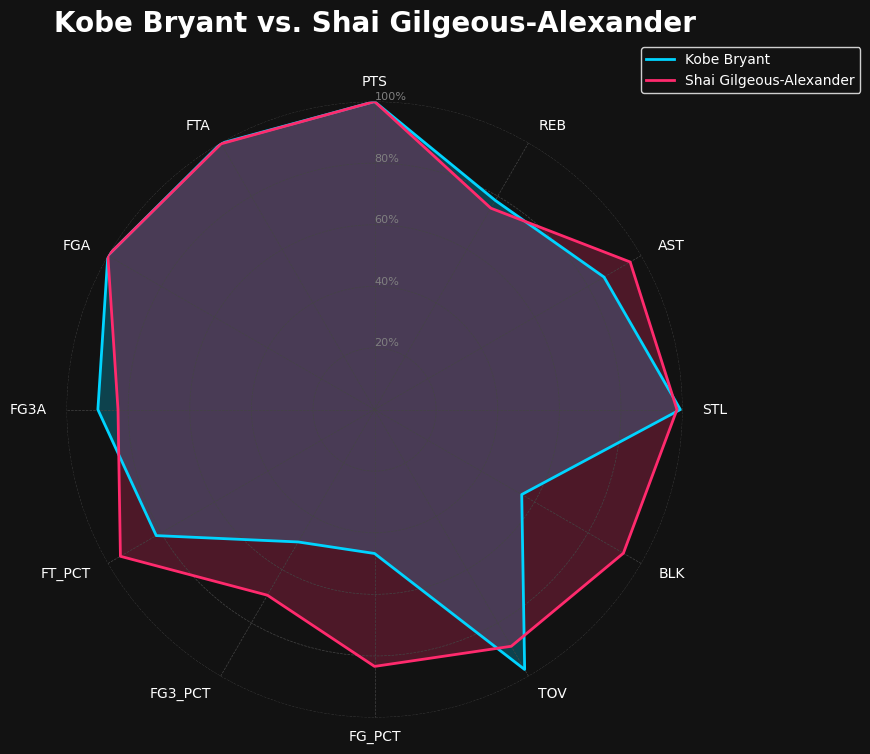

PLAYER_NAME      Shai Gilgeous-Alexander
PTS                            32.684211
REB                             4.986842
AST                             6.394737
Player_Type    All-Star / Primary Scorer
Name: 10128, dtype: object

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy.stats import percentileofscore

# --- HELPER 1: CONVERT STATS TO PERCENTILES ---
def get_percentile_ranks(player_stats, population_df, features):
    """
    Converts raw stats into percentile ranks (0-100) relative to the population.
    Example: 30 PPG might be the 99th percentile (0.99).
    """
    percentiles = []
    for feature, value in zip(features, player_stats):
        # We calculate the percentile of this player's stat within the modern league column
        pct = percentileofscore(population_df[feature], value) / 100.0
        percentiles.append(pct)
    return percentiles

# --- HELPER 2: AESTHETIC RADAR CHART ---
def create_pro_radar_chart(player1_name, p1_percentiles, player2_name, p2_percentiles, features):
    """
    Plots a professional-grade radar chart using Percentiles (0-1 range).
    """
    # 1. Setup Angles
    num_vars = len(features)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]
    
    # 2. Setup Figure (Dark Theme)
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    fig.patch.set_facecolor('#121212') # Dark background
    ax.set_facecolor('#121212')
    
    # 3. Setup Axis (The "Spider Web")
    ax.set_theta_offset(pi / 2) # Rotate so the first axis is at the top
    ax.set_theta_direction(-1) # Clockwise
    
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], features, color='white', size=10)
    
    # Fix Label Padding (move them away from the plot)
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')

    # Draw ylabels (The circles: 20%, 40%, 60%, 80%, 100%)
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["20%", "40%", "60%", "80%", "100%"], color="grey", size=8)
    plt.ylim(0, 1.0) # Limit to 0-100% range
    
    # Customize the Grid
    ax.grid(color='#444444', linestyle='--', linewidth=0.5) # Subtle grid
    ax.spines['polar'].set_visible(False) # Remove outer circle border

    # 4. Plot Player 1 (Historical - Cyan/Blue)
    values1 = p1_percentiles + p1_percentiles[:1]
    ax.plot(angles, values1, linewidth=2, linestyle='solid', color='#00d4ff', label=player1_name)
    ax.fill(angles, values1, '#00d4ff', alpha=0.25)
    
    # 5. Plot Player 2 (Modern - Magenta/Red)
    values2 = p2_percentiles + p2_percentiles[:1]
    ax.plot(angles, values2, linewidth=2, linestyle='solid', color='#ff2a6d', label=player2_name)
    ax.fill(angles, values2, '#ff2a6d', alpha=0.25)
    
    # 6. Title & Legend
    plt.title(f"{player1_name} vs. {player2_name}", size=20, color='white', y=1.1, weight='bold')
    
    legend = plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), facecolor='#121212', edgecolor='white')
    for text in legend.get_texts():
        text.set_color("white")
        
    plt.show()

# --- MAIN ANALYSIS FUNCTION (UPDATED) ---
def analyze_player(player_name, season_id):
    
    # 1. FIND ID
    target_id = None
    for pid, name in player_id_to_name.items():
        if name.lower() == player_name.lower():
            target_id = pid
            break
    if target_id is None: return f"Error: {player_name} not found."

    # 2. GET STATS
    target_player = master_season_pergame_df[
        (master_season_pergame_df['PLAYER_ID'] == target_id) & 
        (master_season_pergame_df['SEASON_ID'] == season_id)
    ]
    if target_player.empty: return f"Error: No stats for {season_id}"
    
    # Handle Duplicates (Take max GP)
    if len(target_player) > 1:
        target_player = target_player.sort_values('GP', ascending=False).head(1)

    # 3. MATH: CALCULATE SIMILARITY (Using Z-Scores/StandardScaler for accuracy)
    target_vector = target_player[features].fillna(0)
    target_vector_scaled = scaler.transform(target_vector)
    
    distances = euclidean_distances(target_vector_scaled, ml_scaled_df)
    closest_idx = distances[0].argmin()
    similarity_score = distances[0][closest_idx]
    
    # Get Modern Match
    modern_player_row = ml_df.iloc[closest_idx]
    modern_name = modern_player_row['PLAYER_NAME']
    modern_cluster = cluster_names[modern_player_row['Cluster']]

    # 4. VISUALS: CONVERT TO PERCENTILES (For the chart only!)
    # We compare the target player's RAW stats to the MODERN league population
    p1_stats = target_vector.values.flatten()
    p2_stats = modern_player_row[features].values.flatten()
    
    # Get Percentiles relative to the 'ml_df' (Current NBA)
    p1_percentiles = get_percentile_ranks(p1_stats, ml_df, features)
    p2_percentiles = get_percentile_ranks(p2_stats, ml_df, features)
    
    # 5. PRINT & PLOT
    print(f"--- ANALYZING: {player_name} ({season_id}) ---")
    print(f"Archetype: {modern_cluster}")
    print(f"Modern Match: {modern_name} (Dist: {similarity_score:.3f})\n")
    
    create_pro_radar_chart(player_name, p1_percentiles, modern_name, p2_percentiles, features)
    
    return modern_player_row[['PLAYER_NAME', 'PTS', 'REB', 'AST', 'Player_Type']]

# --- TEST ---
analyze_player("Kobe Bryant", "2005-06")

In [22]:
import pickle
import os

# 1. Create a folder to keep things organized
if not os.path.exists('model_data'):
    os.makedirs('model_data')

# 2. Save the Scaler (The "Translator")
# We need this to scale user inputs exactly like we scaled the training data
with open('model_data/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# 3. Save the K-Means Model (The "Brain")
with open('model_data/kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# 4. Save the Processed Dataframes
# We save the processed ML dataframe (with clusters) and the per-game stats
ml_df.to_pickle('model_data/ml_df.pkl')
master_season_pergame_df.to_pickle('model_data/master_season_pergame_df.pkl')

print("Success! All models and data have been saved to the 'model_data' folder.")

Success! All models and data have been saved to the 'model_data' folder.


### Final